In [8]:
# Importamos las librerías necesarias para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:

# Cargar el dataset de recursos y características
ubicaciones_df = pd.read_csv('datasets/ubicaciones.csv')

ubicaciones_df

,ID_UBICACIO,DS_UBICACIO,ID_TIPUS_DEPENDENCIA,ID_EDIFICI,QL_PORTA,IND_METRES,ID_SN_BAIXA
0,C0/035.3,Arxiu Gestió Acadèmica Biocièn,16,C,C0/035.3,16.0,N
1,C0/019,Arxiu Gestió Acadèmica Cièncie,1,C,C0/019,26.0,N
2,A/1043,Arxiu Of.Coord.Institucional,1,A,A/1043,27.0,N
3,B7/050B,Ascensor,45,B,B7/050B,3.0,N
4,B9/002,Ascensor,45,B,B9/002,4.0,N
...,...,...,...,...,...,...,...
9310,V7/001,Vestíbul entrada Llatzaret,43,V,V7/001,7.0,N
9311,G5/0X1,Vestíbul exterior Facultat,14,G,G5/0X1,221.0,N
9312,QS/1010,Vestíbul lavabo homes,23,Q,QS/1010,3.0,N
9313,C5/1080,Vestíbul lavabos,23,C,C5/1080,8.0,N


In [10]:
# ------------------------------------------
# LIMPIEZA DE DATOS
# ------------------------------------------

# Paso 1: Imputar valores nulos en columnas clave
# Justificación: La columna 'IND_METRES' tiene un valor nulo. Decidimos imputarlo con la mediana para no perder información relevante.
# Además, 'QL_PORTA' representa la puerta de acceso y, aunque no es una columna crítica, imputamos su valor nulo con 'SIN_DATOS'.
mediana_metres = ubicaciones_df['IND_METRES'].median()
ubicaciones_df['IND_METRES'] = ubicaciones_df['IND_METRES'].fillna(mediana_metres)
ubicaciones_df['QL_PORTA'] = ubicaciones_df['QL_PORTA'].fillna('SIN_DATOS')


In [21]:

# ------------------------------------------
# FILTRADO DE DATOS PARA LA ESCUELA DE INGENIERÍA
# ------------------------------------------

# Paso 2: Filtrar por edificio 'Q' (Escuela de Ingeniería) y tipos de espacio de interés (aula, laboratori, seminari)
# Justificación: El análisis se centra en la Escuela de Ingeniería, por lo que seleccionamos únicamente el edificio 'Q'.
# Para identificar aulas, laboratorios y seminarios, buscamos palabras clave en 'DS_UBICACIO'.
espacios_interes_df = ubicaciones_df[
    (ubicaciones_df['ID_EDIFICI'] == 'Q') &
    (ubicaciones_df['DS_UBICACIO'].str.contains('aula|laboratori|seminari', case=False, na=False))
]

espacios_interes_df

,ID_UBICACIO,DS_UBICACIO,ID_TIPUS_DEPENDENCIA,ID_EDIFICI,QL_PORTA,IND_METRES,ID_SN_BAIXA
71,Q1/1003,Aula Q1/1003 (dues portes),4,Q,Q1/1003,106.0,N
72,Q3/0013,Aula Q3/0013,4,Q,Q3/0013,50.0,N
73,Q4/1013,Aula Q4/1013 (dues portes),4,Q,Q4/1013,104.0,N
81,Q1/0007,Aula d'informàtica A (2 portes,7,Q,Q1/0007,103.0,N
92,Q3/0005,Aula docent,4,Q,Q3/0005,106.0,S
...,...,...,...,...,...,...,...
8916,QC/2061,Laboratori,20,Q,QC/2061,36.0,N
8917,QP/0003.1,Laboratori,20,Q,QP/0003.1,6.0,N
9193,QC/2080,Seminari,41,Q,QC/2080,34.0,N
9260,QC/2099,laboratori docent,21,Q,QC/2099,30.0,N


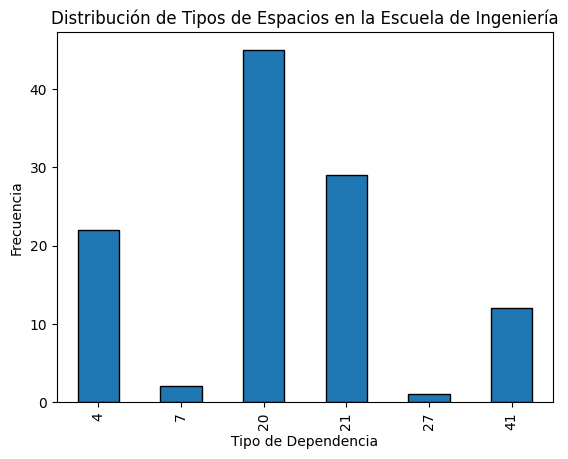

In [12]:

# ------------------------------------------
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ------------------------------------------

# Paso 3: Análisis de la distribución de tipos de espacios ('ID_TIPUS_DEPENDENCIA') en la Escuela de Ingeniería
# Justificación: Visualizar los tipos de espacios ayuda a comprender la variedad de dependencias en la Escuela de Ingeniería.
espacios_interes_df['ID_TIPUS_DEPENDENCIA'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Tipo de Dependencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Espacios en la Escuela de Ingeniería')
plt.show()


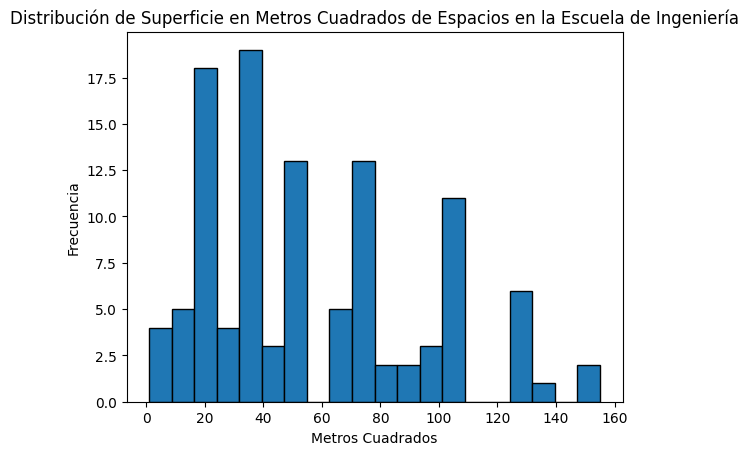

In [13]:

# Paso 4: Análisis de la distribución de superficie en metros cuadrados ('IND_METRES')
# Justificación: La superficie en metros cuadrados nos indica el tamaño de los espacios, lo cual es importante para la asignación de grupos y recursos.
plt.hist(espacios_interes_df['IND_METRES'], bins=20, edgecolor='black')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Frecuencia')
plt.title('Distribución de Superficie en Metros Cuadrados de Espacios en la Escuela de Ingeniería')
plt.show()


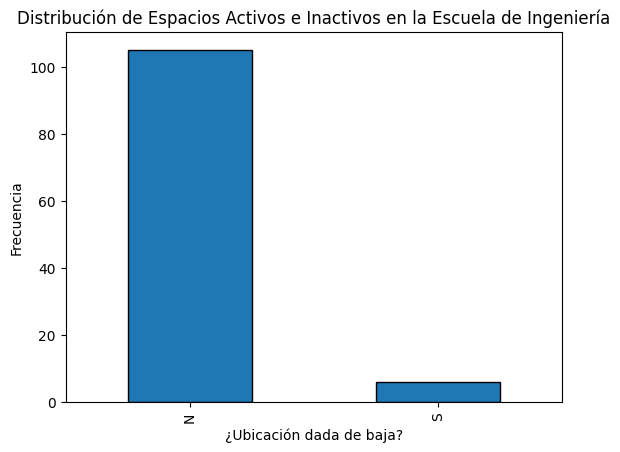

In [14]:

# Paso 5: Análisis del estado de los espacios ('ID_SN_BAIXA')
# Justificación: Visualizar el estado (activo o inactivo) de los espacios permite identificar oportunidades para optimizar el uso de los recursos disponibles.
espacios_interes_df['ID_SN_BAIXA'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('¿Ubicación dada de baja?')
plt.ylabel('Frecuencia')
plt.title('Distribución de Espacios Activos e Inactivos en la Escuela de Ingeniería')
plt.show()


In [15]:

# ------------------------------------------
# CONCLUSIONES
# ------------------------------------------

# 1. **Distribución de Tipos de Espacios**: En la Escuela de Ingeniería (edificio Q), existen varios tipos de dependencias,
#    aunque algunos son mucho más frecuentes, como las aulas. Esto sugiere una predominancia de espacios destinados a la docencia.
#
# 2. **Distribución de Superficie en Metros Cuadrados**: La mayoría de los espacios tienen una superficie entre 50 y 100 metros cuadrados,
#    lo cual es importante para decidir qué grupos pueden asignarse a cada espacio en función de sus necesidades.
#
# 3. **Estado de los Espacios**: La mayoría de las ubicaciones están activas, aunque también hay algunas marcadas como inactivas.
#    Esto podría ofrecer una oportunidad para reactivar ciertos espacios si fuera necesario para la planificación.

# Este análisis permite extraer conclusiones sobre la distribución y uso de los espacios en la Escuela de Ingeniería, lo cual facilita
# la optimización en la asignación de aulas, laboratorios y seminarios para los estudiantes y los diferentes tipos de actividades.


In [22]:
# ------------------------------------------
# EXPORTAR EL DATASET LIMPIO
# ------------------------------------------

# Guardar el dataset filtrado y transformado en un nuevo archivo CSV
espacios_interes_df.to_csv('ubicaciones_cleaned.csv', index=False)